# Анализ сбойности устройств самообслуживания

Для работы взяты инциденты по сбоям устройств самообслуживания за 2018, 2019, 2020 годы.



Решить задачи :
1. Кластеризация устройств на несколько классов:
a. Рисковые устройства – устройства, требующие рассмотрения вывода из эксплуатации
b. Устройства, требующие внимания – проведение срочных мероприятий не требуется, но на перспективу необходимо заложить работу по замене
c. Устройства не требующие внимания.

2. Классификация заявок по качеству исполнения с целью предупреждения возникновения той или иной проблемы. target- статус




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'dataset_atm_01.03-new.txt', sep='\t')

In [3]:
df

,IdATM,Статус,Год,Дата последней задачи,Банкомат/ИПТ--Снятие системного блока на ремонт,Программное обеспечение--OFFLINE. Требуется перезагрузка,Программное обеспечение--Завис. Требуется перезагрузка.,Программное обеспечение--Переустановка банкоматного ПО,Программное обеспечение--Требуется проверка сист. блока,Cerber--Гарантийный ремонт.,...,Чековый принтер--Ремонт,Чековый принтер--Сбой,Банкомат/ИПТ--Проверка работоспособности,Банкомат/ИПТ--требуется ремонт кассет,Банкомат/ИПТ--Ремонт замка,Депозит--Сбой.Необходимо сбросить ошибку.,"Банкомат/ИПТ--Не работает сканер штрих-кодов, требуется проверка",Депозит--Разгружен. Требуется замена купюроприемника,Банкомат/ИПТ--Ошибка по журнальному принтеру,"Время просрочки, ч"
0,1,Работает,2018,23.02.2021,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,NaN
1,2,Работает,2018,23.02.2021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,3,Работает,2018,18.02.2021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,5,Снят,2018,11.02.2020,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,NaN
4,6,Работает,2018,24.02.2021,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901,70000262,Работает,2020,26.02.2021,0,14,0,0,0,0,...,0,14,0,0,0,0,0,0,0,"120,5"
3902,70000263,Работает,2020,22.02.2021,0,5,0,0,0,0,...,0,1,0,0,0,1,0,2,0,"98,0"
3903,70000264,Работает,2020,09.02.2021,0,13,1,0,0,0,...,0,0,1,0,0,0,0,1,0,"109,6"
3904,70000265,Работает,2020,28.01.2021,0,12,0,0,0,0,...,0,0,2,0,0,0,0,0,0,"148,2"


In [4]:
df.pop('IdATM')

0              1
1              2
2              3
3              5
4              6
          ...   
3901    70000262
3902    70000263
3903    70000264
3904    70000265
3905    70000266
Name: IdATM, Length: 3906, dtype: int64

In [5]:
df.pop('Год')

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
3901    2020
3902    2020
3903    2020
3904    2020
3905    2020
Name: Год, Length: 3906, dtype: int64

In [6]:
df

,Статус,Дата последней задачи,Банкомат/ИПТ--Снятие системного блока на ремонт,Программное обеспечение--OFFLINE. Требуется перезагрузка,Программное обеспечение--Завис. Требуется перезагрузка.,Программное обеспечение--Переустановка банкоматного ПО,Программное обеспечение--Требуется проверка сист. блока,Cerber--Гарантийный ремонт.,Cerber--требуется включить,Detwig--N\A,...,Чековый принтер--Ремонт,Чековый принтер--Сбой,Банкомат/ИПТ--Проверка работоспособности,Банкомат/ИПТ--требуется ремонт кассет,Банкомат/ИПТ--Ремонт замка,Депозит--Сбой.Необходимо сбросить ошибку.,"Банкомат/ИПТ--Не работает сканер штрих-кодов, требуется проверка",Депозит--Разгружен. Требуется замена купюроприемника,Банкомат/ИПТ--Ошибка по журнальному принтеру,"Время просрочки, ч"
0,Работает,23.02.2021,0,0,0,0,0,0,0,1,...,0,3,0,0,0,0,0,0,0,NaN
1,Работает,23.02.2021,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,NaN
2,Работает,18.02.2021,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,Снят,11.02.2020,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,NaN
4,Работает,24.02.2021,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901,Работает,26.02.2021,0,14,0,0,0,0,0,0,...,0,14,0,0,0,0,0,0,0,"120,5"
3902,Работает,22.02.2021,0,5,0,0,0,0,0,0,...,0,1,0,0,0,1,0,2,0,"98,0"
3903,Работает,09.02.2021,0,13,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,"109,6"
3904,Работает,28.01.2021,0,12,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,"148,2"


In [7]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc # метрики качества
from sklearn.metrics import confusion_matrix, accuracy_score # метрики качества
from sklearn.metrics import average_precision_score # метрики качества
from sklearn.preprocessing import LabelEncoder

In [8]:
label_encoder = LabelEncoder()

In [9]:
text_features = ['Статус']

In [10]:
for col in text_features:
   df[col] = label_encoder.fit_transform(df[col])  

In [11]:
df.loc[(df['Статус'] == 1), 'Статус'] = 0


In [12]:
df.loc[(df['Статус'] == 2), 'Статус'] = 1 

In [13]:
df

,Статус,Дата последней задачи,Банкомат/ИПТ--Снятие системного блока на ремонт,Программное обеспечение--OFFLINE. Требуется перезагрузка,Программное обеспечение--Завис. Требуется перезагрузка.,Программное обеспечение--Переустановка банкоматного ПО,Программное обеспечение--Требуется проверка сист. блока,Cerber--Гарантийный ремонт.,Cerber--требуется включить,Detwig--N\A,...,Чековый принтер--Ремонт,Чековый принтер--Сбой,Банкомат/ИПТ--Проверка работоспособности,Банкомат/ИПТ--требуется ремонт кассет,Банкомат/ИПТ--Ремонт замка,Депозит--Сбой.Необходимо сбросить ошибку.,"Банкомат/ИПТ--Не работает сканер штрих-кодов, требуется проверка",Депозит--Разгружен. Требуется замена купюроприемника,Банкомат/ИПТ--Ошибка по журнальному принтеру,"Время просрочки, ч"
0,0,23.02.2021,0,0,0,0,0,0,0,1,...,0,3,0,0,0,0,0,0,0,NaN
1,0,23.02.2021,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,NaN
2,0,18.02.2021,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,1,11.02.2020,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,NaN
4,0,24.02.2021,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901,0,26.02.2021,0,14,0,0,0,0,0,0,...,0,14,0,0,0,0,0,0,0,"120,5"
3902,0,22.02.2021,0,5,0,0,0,0,0,0,...,0,1,0,0,0,1,0,2,0,"98,0"
3903,0,09.02.2021,0,13,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,"109,6"
3904,0,28.01.2021,0,12,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,"148,2"


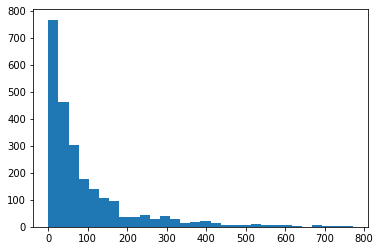

In [14]:
df.iloc[:,-1]=df.iloc[:,-1].str.replace(',','.')
df.iloc[:,-1].replace('#Н/Д', np.nan, inplace=True)
df.iloc[:, -1] = df.iloc[:,-1].astype(np.float)
cut_treshold = 0.99
df = df[df.iloc[:,-1]<df.iloc[:,-1].quantile(cut_treshold)]
df.iloc[:,-1].fillna(df.median(), inplace=True)

plt.hist(df.iloc[:,-1], bins=30);

In [15]:


from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)



In [16]:
train.shape

(1682, 72)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 3754 to 1535
Data columns (total 72 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Статус                                                                             1682 non-null   int32  
 1   Дата последней задачи                                                              1682 non-null   object 
 2   Банкомат/ИПТ--Снятие системного блока на ремонт                                    1682 non-null   int64  
 3   Программное обеспечение--OFFLINE. Требуется перезагрузка                           1682 non-null   int64  
 4   Программное обеспечение--Завис. Требуется перезагрузка.                            1682 non-null   int64  
 5   Программное обеспечение--Переустановка банкоматного ПО                             1682 non-null   in

In [18]:
train.dropna()
train.shape

(1682, 72)

In [19]:
train1 = train._get_numeric_data()
train1.head()

,Статус,Банкомат/ИПТ--Снятие системного блока на ремонт,Программное обеспечение--OFFLINE. Требуется перезагрузка,Программное обеспечение--Завис. Требуется перезагрузка.,Программное обеспечение--Переустановка банкоматного ПО,Программное обеспечение--Требуется проверка сист. блока,Cerber--Гарантийный ремонт.,Cerber--требуется включить,Detwig--N\A,Detwig--N\A. Требуется перезагрузить АТМ,...,Чековый принтер--Ремонт,Чековый принтер--Сбой,Банкомат/ИПТ--Проверка работоспособности,Банкомат/ИПТ--требуется ремонт кассет,Банкомат/ИПТ--Ремонт замка,Депозит--Сбой.Необходимо сбросить ошибку.,"Банкомат/ИПТ--Не работает сканер штрих-кодов, требуется проверка",Депозит--Разгружен. Требуется замена купюроприемника,Банкомат/ИПТ--Ошибка по журнальному принтеру,"Время просрочки, ч"
3754,0,0,7,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,14.3
2289,0,0,1,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,89.1
3052,0,0,25,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,0,0,135.3
1685,0,0,2,0,0,0,0,0,2,2,...,0,1,0,0,0,0,0,0,0,11.2
2892,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,178.9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020539DE5848>,
      dtype=object)

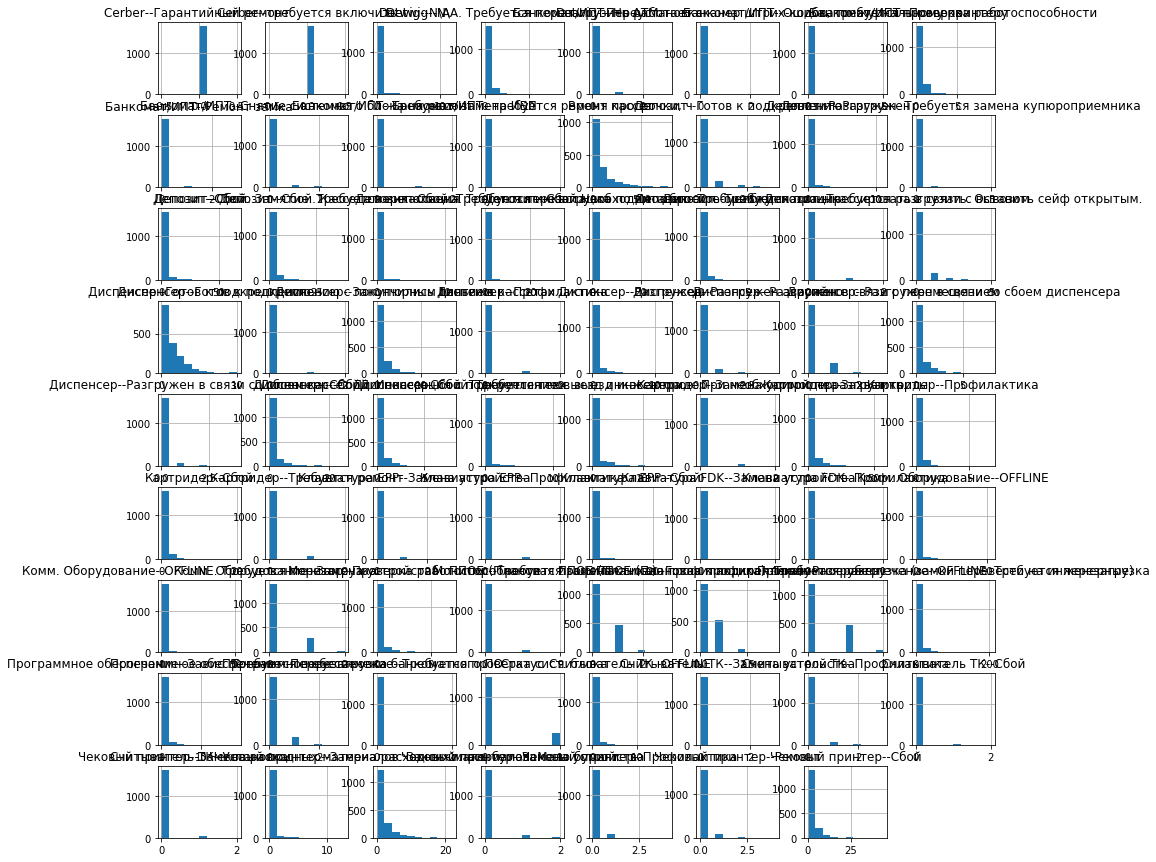

In [20]:
train1.hist(figsize=(15, 15))

In [21]:
target_variable_name = 'Статус'

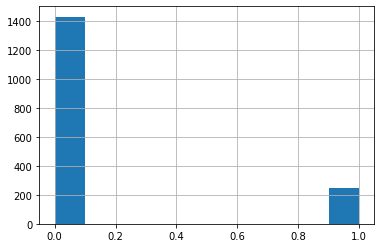

In [22]:
train['Статус'].hist()

In [23]:
training_values = train1[target_variable_name]

In [24]:
training_points = train1.drop(target_variable_name, axis=1)

In [25]:
training_points.head()

,Банкомат/ИПТ--Снятие системного блока на ремонт,Программное обеспечение--OFFLINE. Требуется перезагрузка,Программное обеспечение--Завис. Требуется перезагрузка.,Программное обеспечение--Переустановка банкоматного ПО,Программное обеспечение--Требуется проверка сист. блока,Cerber--Гарантийный ремонт.,Cerber--требуется включить,Detwig--N\A,Detwig--N\A. Требуется перезагрузить АТМ,Detwig--Переустановка,...,Чековый принтер--Ремонт,Чековый принтер--Сбой,Банкомат/ИПТ--Проверка работоспособности,Банкомат/ИПТ--требуется ремонт кассет,Банкомат/ИПТ--Ремонт замка,Депозит--Сбой.Необходимо сбросить ошибку.,"Банкомат/ИПТ--Не работает сканер штрих-кодов, требуется проверка",Депозит--Разгружен. Требуется замена купюроприемника,Банкомат/ИПТ--Ошибка по журнальному принтеру,"Время просрочки, ч"
3754,0,7,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,14.3
2289,0,1,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,89.1
3052,0,25,0,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,0,0,135.3
1685,0,2,0,0,0,0,0,2,2,0,...,0,1,0,0,0,0,0,0,0,11.2
2892,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,178.9


In [26]:
training_values.dropna() #удаление NAN

3754    0
2289    0
3052    0
1685    0
2892    0
       ..
1486    1
2272    0
3693    0
2456    0
1535    1
Name: Статус, Length: 1682, dtype: int32

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

In [28]:
training_points.dropna()
training_points.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 3754 to 1535
Data columns (total 70 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Банкомат/ИПТ--Снятие системного блока на ремонт                                    1682 non-null   int64  
 1   Программное обеспечение--OFFLINE. Требуется перезагрузка                           1682 non-null   int64  
 2   Программное обеспечение--Завис. Требуется перезагрузка.                            1682 non-null   int64  
 3   Программное обеспечение--Переустановка банкоматного ПО                             1682 non-null   int64  
 4   Программное обеспечение--Требуется проверка сист. блока                            1682 non-null   int64  
 5   Cerber--Гарантийный ремонт.                                                        1682 non-null   in

In [29]:
test.head()

,Статус,Дата последней задачи,Банкомат/ИПТ--Снятие системного блока на ремонт,Программное обеспечение--OFFLINE. Требуется перезагрузка,Программное обеспечение--Завис. Требуется перезагрузка.,Программное обеспечение--Переустановка банкоматного ПО,Программное обеспечение--Требуется проверка сист. блока,Cerber--Гарантийный ремонт.,Cerber--требуется включить,Detwig--N\A,...,Чековый принтер--Ремонт,Чековый принтер--Сбой,Банкомат/ИПТ--Проверка работоспособности,Банкомат/ИПТ--требуется ремонт кассет,Банкомат/ИПТ--Ремонт замка,Депозит--Сбой.Необходимо сбросить ошибку.,"Банкомат/ИПТ--Не работает сканер штрих-кодов, требуется проверка",Депозит--Разгружен. Требуется замена купюроприемника,Банкомат/ИПТ--Ошибка по журнальному принтеру,"Время просрочки, ч"
1709,0,19.11.2020,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,0,0,0,220.8
3020,0,18.02.2021,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,125.0
3836,0,14.02.2021,0,15,0,0,0,0,0,0,...,0,3,0,0,0,1,0,0,0,20.7
3064,0,27.12.2020,0,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,17.9
1695,0,18.02.2021,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,23.0


In [30]:
test.shape

(722, 72)

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 1709 to 3086
Data columns (total 72 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Статус                                                                             722 non-null    int32  
 1   Дата последней задачи                                                              722 non-null    object 
 2   Банкомат/ИПТ--Снятие системного блока на ремонт                                    722 non-null    int64  
 3   Программное обеспечение--OFFLINE. Требуется перезагрузка                           722 non-null    int64  
 4   Программное обеспечение--Завис. Требуется перезагрузка.                            722 non-null    int64  
 5   Программное обеспечение--Переустановка банкоматного ПО                             722 non-null    int

In [32]:
test1=test._get_numeric_data()

In [33]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 1709 to 3086
Data columns (total 71 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Статус                                                                             722 non-null    int32  
 1   Банкомат/ИПТ--Снятие системного блока на ремонт                                    722 non-null    int64  
 2   Программное обеспечение--OFFLINE. Требуется перезагрузка                           722 non-null    int64  
 3   Программное обеспечение--Завис. Требуется перезагрузка.                            722 non-null    int64  
 4   Программное обеспечение--Переустановка банкоматного ПО                             722 non-null    int64  
 5   Программное обеспечение--Требуется проверка сист. блока                            722 non-null    int

In [34]:
test1['Статус'].fillna(method ='ffill', inplace = True)

In [35]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 1709 to 3086
Data columns (total 71 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Статус                                                                             722 non-null    int32  
 1   Банкомат/ИПТ--Снятие системного блока на ремонт                                    722 non-null    int64  
 2   Программное обеспечение--OFFLINE. Требуется перезагрузка                           722 non-null    int64  
 3   Программное обеспечение--Завис. Требуется перезагрузка.                            722 non-null    int64  
 4   Программное обеспечение--Переустановка банкоматного ПО                             722 non-null    int64  
 5   Программное обеспечение--Требуется проверка сист. блока                            722 non-null    int

In [36]:
test_values = test1[target_variable_name]

In [37]:
test_points = test1.drop(target_variable_name, axis=1)

In [38]:
test_points.head()

,Банкомат/ИПТ--Снятие системного блока на ремонт,Программное обеспечение--OFFLINE. Требуется перезагрузка,Программное обеспечение--Завис. Требуется перезагрузка.,Программное обеспечение--Переустановка банкоматного ПО,Программное обеспечение--Требуется проверка сист. блока,Cerber--Гарантийный ремонт.,Cerber--требуется включить,Detwig--N\A,Detwig--N\A. Требуется перезагрузить АТМ,Detwig--Переустановка,...,Чековый принтер--Ремонт,Чековый принтер--Сбой,Банкомат/ИПТ--Проверка работоспособности,Банкомат/ИПТ--требуется ремонт кассет,Банкомат/ИПТ--Ремонт замка,Депозит--Сбой.Необходимо сбросить ошибку.,"Банкомат/ИПТ--Не работает сканер штрих-кодов, требуется проверка",Депозит--Разгружен. Требуется замена купюроприемника,Банкомат/ИПТ--Ошибка по журнальному принтеру,"Время просрочки, ч"
1709,0,0,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,0,0,0,220.8
3020,0,7,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,125.0
3836,0,15,0,0,0,0,0,0,0,0,...,0,3,0,0,0,1,0,0,0,20.7
3064,0,3,0,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,17.9
1695,0,0,0,0,0,0,0,0,3,0,...,0,1,0,0,0,0,0,0,0,23.0


In [39]:
train.corr()

,Статус,Банкомат/ИПТ--Снятие системного блока на ремонт,Программное обеспечение--OFFLINE. Требуется перезагрузка,Программное обеспечение--Завис. Требуется перезагрузка.,Программное обеспечение--Переустановка банкоматного ПО,Программное обеспечение--Требуется проверка сист. блока,Cerber--Гарантийный ремонт.,Cerber--требуется включить,Detwig--N\A,Detwig--N\A. Требуется перезагрузить АТМ,...,Чековый принтер--Ремонт,Чековый принтер--Сбой,Банкомат/ИПТ--Проверка работоспособности,Банкомат/ИПТ--требуется ремонт кассет,Банкомат/ИПТ--Ремонт замка,Депозит--Сбой.Необходимо сбросить ошибку.,"Банкомат/ИПТ--Не работает сканер штрих-кодов, требуется проверка",Депозит--Разгружен. Требуется замена купюроприемника,Банкомат/ИПТ--Ошибка по журнальному принтеру,"Время просрочки, ч"
Статус,1.000000,-0.052806,-0.050053,-0.082818,-0.070161,-0.017662,NaN,NaN,-0.004205,-0.008924,...,-0.040081,-0.016406,-0.082173,-0.017662,-0.028148,-0.031613,-0.023362,-0.042043,0.055695,-0.078061
Банкомат/ИПТ--Снятие системного блока на ремонт,-0.052806,1.000000,0.118756,0.075900,0.266263,0.054878,NaN,NaN,-0.004126,0.038530,...,0.032933,0.012564,0.140762,-0.006823,0.020889,0.191441,0.003876,0.083255,-0.008204,0.099575
Программное обеспечение--OFFLINE. Требуется перезагрузка,-0.050053,0.118756,1.000000,0.068738,0.148891,-0.003754,NaN,NaN,0.077346,0.103342,...,-0.020050,-0.000100,0.153481,0.122386,-0.008604,0.055003,0.047806,0.059328,0.007291,0.088669
Программное обеспечение--Завис. Требуется перезагрузка.,-0.082818,0.075900,0.068738,1.000000,0.107609,0.021732,NaN,NaN,-0.013049,0.013744,...,0.051282,0.040192,0.128033,-0.011140,-0.010606,-0.006174,-0.021681,-0.018945,0.004848,0.037994
Программное обеспечение--Переустановка банкоматного ПО,-0.070161,0.266263,0.148891,0.107609,1.000000,0.061198,NaN,NaN,-0.034869,0.023408,...,-0.013986,0.010768,0.145161,0.061198,0.023169,-0.014521,0.003578,-0.016757,0.024669,0.138997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Депозит--Сбой.Необходимо сбросить ошибку.,-0.031613,0.191441,0.055003,-0.006174,-0.014521,-0.003198,NaN,NaN,-0.017585,-0.031879,...,-0.018469,0.000851,0.010818,-0.003198,0.152308,1.000000,0.044088,0.291772,0.005283,0.035831
"Банкомат/ИПТ--Не работает сканер штрих-кодов, требуется проверка",-0.023362,0.003876,0.047806,-0.021681,0.003578,-0.003478,NaN,NaN,-0.009967,-0.036665,...,-0.020083,-0.013820,0.052997,-0.003478,0.101290,0.044088,1.000000,0.055888,-0.004181,0.065949
Депозит--Разгружен. Требуется замена купюроприемника,-0.042043,0.083255,0.059328,-0.018945,-0.016757,-0.004253,NaN,NaN,-0.016664,-0.036237,...,-0.024563,0.067646,0.026800,-0.004253,0.035625,0.291772,0.055888,1.000000,0.016230,0.030323
Банкомат/ИПТ--Ошибка по журнальному принтеру,0.055695,-0.008204,0.007291,0.004848,0.024669,-0.002148,NaN,NaN,-0.007504,0.025732,...,-0.012406,0.007442,-0.002566,-0.002148,-0.004839,0.005283,-0.004181,0.016230,1.000000,-0.005886


In [40]:
test_points.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 1709 to 3086
Data columns (total 70 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Банкомат/ИПТ--Снятие системного блока на ремонт                                    722 non-null    int64  
 1   Программное обеспечение--OFFLINE. Требуется перезагрузка                           722 non-null    int64  
 2   Программное обеспечение--Завис. Требуется перезагрузка.                            722 non-null    int64  
 3   Программное обеспечение--Переустановка банкоматного ПО                             722 non-null    int64  
 4   Программное обеспечение--Требуется проверка сист. блока                            722 non-null    int64  
 5   Cerber--Гарантийный ремонт.                                                        722 non-null    int

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 3754 to 1535
Data columns (total 72 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Статус                                                                             1682 non-null   int32  
 1   Дата последней задачи                                                              1682 non-null   object 
 2   Банкомат/ИПТ--Снятие системного блока на ремонт                                    1682 non-null   int64  
 3   Программное обеспечение--OFFLINE. Требуется перезагрузка                           1682 non-null   int64  
 4   Программное обеспечение--Завис. Требуется перезагрузка.                            1682 non-null   int64  
 5   Программное обеспечение--Переустановка банкоматного ПО                             1682 non-null   in

In [42]:
list(test_points)==list(training_points)

True

In [43]:
import pandas as pd
import numpy as np
import datetime
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import chardet
from statistics import mode
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from graphviz import Source
from sklearn.tree import export_graphviz

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss


In [45]:
tree = GridSearchCV(DecisionTreeClassifier(random_state=17, class_weight='balanced'),
                  param_grid = {'max_depth' : range(3,6 ),
                                'max_features' : ['auto', 'log2', None],
                                'min_samples_leaf' : range(2, 3),
                                'min_samples_split' : range(2, 3),
                                'criterion' : ['gini', 'entropy'],
                                'presort' : ['auto', True, False],
                                'splitter' : ['best', 'random']},
                  cv=7, scoring='accuracy'
                  ).fit(training_points, training_values)

In [46]:
from sklearn.metrics import accuracy_score
tree.predict(test_points)
tree.predict(training_points)
print('test data')
print(accuracy_score (test_values,tree.predict(test_points)))
print("train data")
print(accuracy_score( training_values,tree.predict(training_points)))





test data
0.8240997229916898
train data
0.821640903686088


In [47]:
log_loss(training_values, tree.predict_proba(training_points))

0.6297776685057582

In [48]:
probs = tree.predict_proba(test_points)
probs = probs[:, 1]
auc = roc_auc_score(test_values, probs)
print('AUC: %.2f' % auc)

AUC: 0.63


In [49]:
pred_val=tree.predict(test_points)
pred_val

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
predtr_val=tree.predict(training_points)
predtr_val

array([1, 0, 0, ..., 0, 0, 0])

In [54]:
false_positive_rates, true_positive_rates, threshold = roc_curve(test_values, probs)

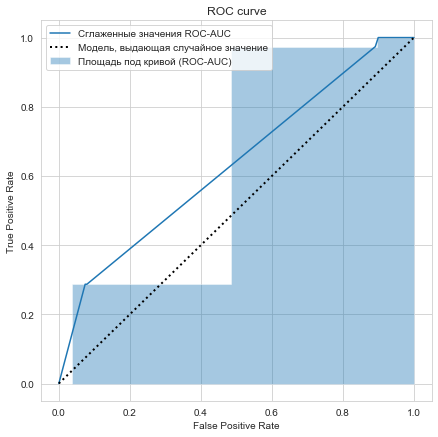

In [55]:

plt.figure(figsize=(7, 7))
plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

In [56]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [57]:
probs

array([0.78191964, 0.45111864, 0.45111864, 0.45111864, 0.45111864,
       0.45111864, 0.        , 0.78191964, 0.45111864, 0.45111864,
       0.45111864, 0.45111864, 0.45111864, 0.45111864, 0.45111864,
       0.13099158, 0.45111864, 0.45111864, 0.45111864, 0.45111864,
       0.78191964, 0.78191964, 0.        , 0.45111864, 0.45111864,
       0.45111864, 0.45111864, 0.45111864, 0.45111864, 0.45111864,
       0.45111864, 0.45111864, 0.78191964, 0.45111864, 0.45111864,
       0.45111864, 0.78191964, 0.45111864, 0.45111864, 0.45111864,
       0.78191964, 0.45111864, 0.45111864, 0.45111864, 0.45111864,
       0.78191964, 0.45111864, 0.78191964, 0.45111864, 0.45111864,
       0.45111864, 0.45111864, 0.45111864, 0.45111864, 0.        ,
       0.45111864, 0.        , 0.        , 0.45111864, 0.45111864,
       0.78191964, 0.45111864, 0.45111864, 0.45111864, 0.45111864,
       0.45111864, 0.45111864, 0.45111864, 0.45111864, 0.13099158,
       0.45111864, 0.45111864, 0.45111864, 0.45111864, 0.     

In [59]:
test_probabilities = tree.predict_proba(test_points)
test_probabilities[:10, :]

array([[0.21808036, 0.78191964],
       [0.54888136, 0.45111864],
       [0.54888136, 0.45111864],
       [0.54888136, 0.45111864],
       [0.54888136, 0.45111864],
       [0.54888136, 0.45111864],
       [1.        , 0.        ],
       [0.21808036, 0.78191964],
       [0.54888136, 0.45111864],
       [0.54888136, 0.45111864]])

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, n_jobs=3, class_weight='balanced')
rf.fit(training_points, training_values)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=3, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [62]:
log_loss(test_values, rf.predict_proba(test_points))

0.308277241206747

In [63]:
from sklearn.metrics import accuracy_score
rf.predict(test_points)
rf.predict(training_points)
print('test data')
print(accuracy_score (test_values,rf.predict(test_points)))
print("train data")
print(accuracy_score( training_values,rf.predict(training_points)))



test data
0.8767313019390581
train data
1.0


In [64]:
probs2 = rf.predict_proba(test_points)
probs2 = probs2[:, 1]
auc = roc_auc_score(test_values, probs2)
print('AUC: %.2f' % auc)

AUC: 0.86


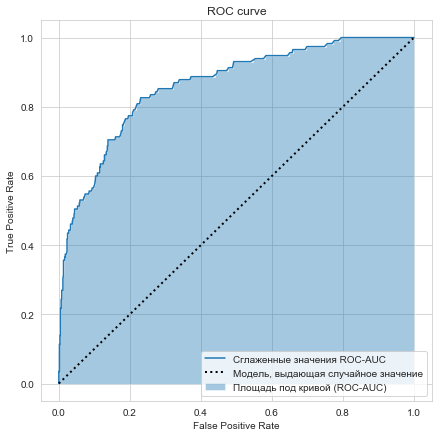

In [66]:
false_positive_rates, true_positive_rates, threshold = roc_curve(test_values, probs2)
plt.figure(figsize=(7, 7))
plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

In [67]:
test_probabilities_rf = rf.predict_proba(test_points)
test_probabilities_rf[:10, :]

array([[0.775, 0.225],
       [0.973, 0.027],
       [0.991, 0.009],
       [0.963, 0.037],
       [0.767, 0.233],
       [0.816, 0.184],
       [0.898, 0.102],
       [0.481, 0.519],
       [0.53 , 0.47 ],
       [0.953, 0.047]])

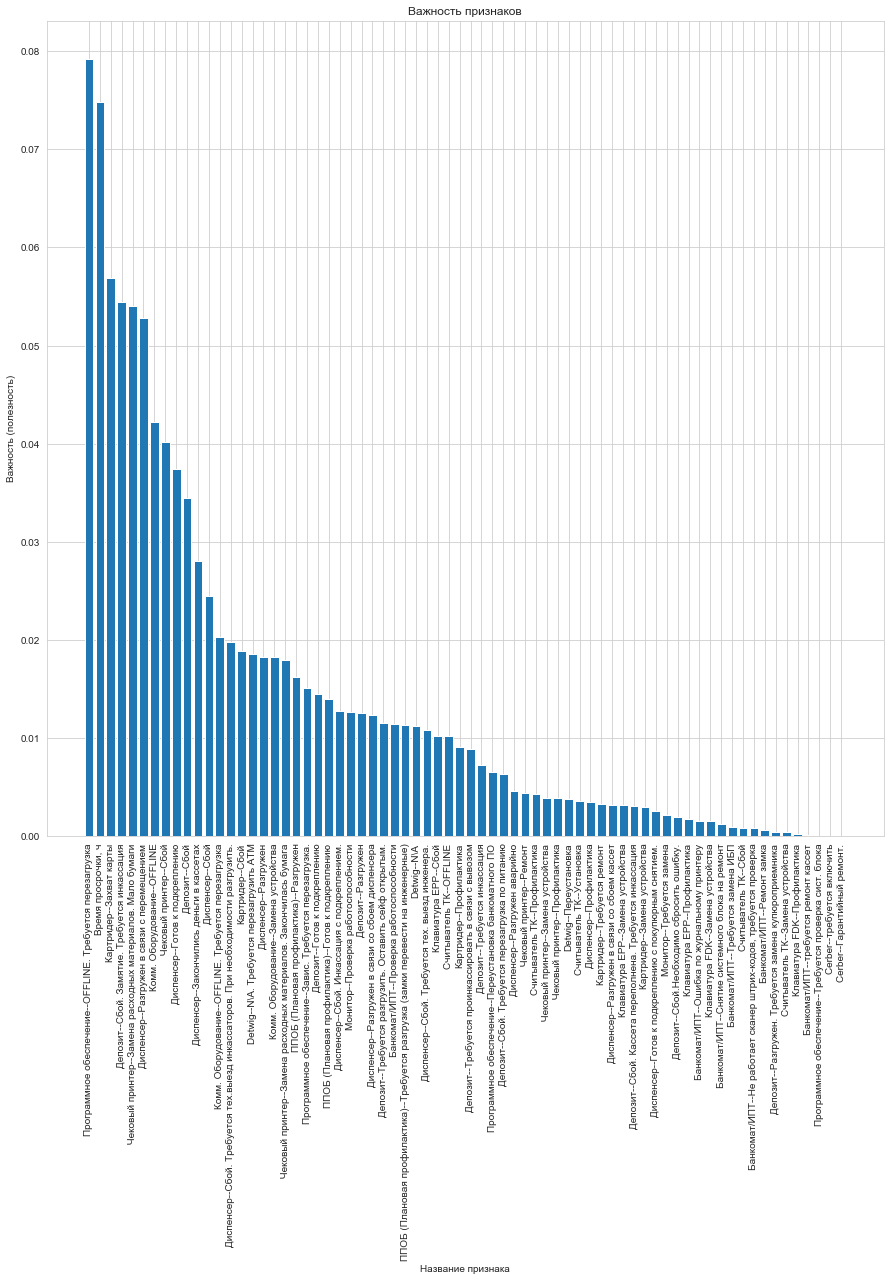

In [68]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
importances.shape

plt.figure(figsize=(15, 15))

plt.title('Важность признаков')
plt.ylabel('Важность (полезность)')
plt.xlabel('Название признака')

plt.bar(training_points.columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()

In [69]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression( )
logreg.fit(training_points, training_values)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
log_loss(training_values, logreg.predict_proba(training_points))

0.3370290674502015

In [71]:
from sklearn.metrics import accuracy_score
logreg.predict(test_points)
logreg.predict(training_points)
print('test data')
print(accuracy_score (test_values,logreg.predict(test_points)))
print("train data")
print(accuracy_score( training_values,logreg.predict(training_points)))


test data
0.8490304709141274
train data
0.8620689655172413
new random test data


In [72]:
probs3 = logreg.predict_proba(test_points)
probs3 = probs3[:, 1]
auc = roc_auc_score(test_values, probs3)
print('AUC: %.2f' % auc)

AUC: 0.78


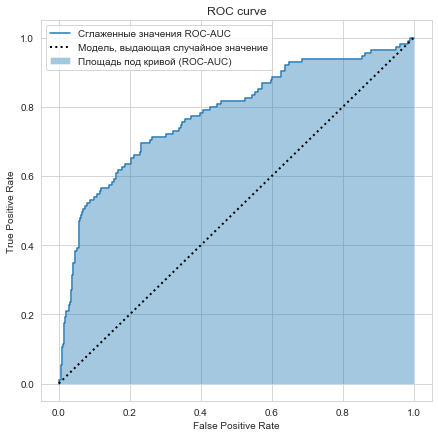

In [74]:
false_positive_rates, true_positive_rates, threshold = roc_curve(test_values, probs3)
plt.figure(figsize=(7, 7))
plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

In [75]:
test_probabilities = logreg.predict_proba(test_points)
test_probabilities[:10, :]

array([[0.68941308, 0.31058692],
       [0.86308958, 0.13691042],
       [0.99238544, 0.00761456],
       [0.75740101, 0.24259899],
       [0.892374  , 0.107626  ],
       [0.91640423, 0.08359577],
       [0.96654608, 0.03345392],
       [0.57696803, 0.42303197],
       [0.43120485, 0.56879515],
       [0.90704542, 0.09295458]])

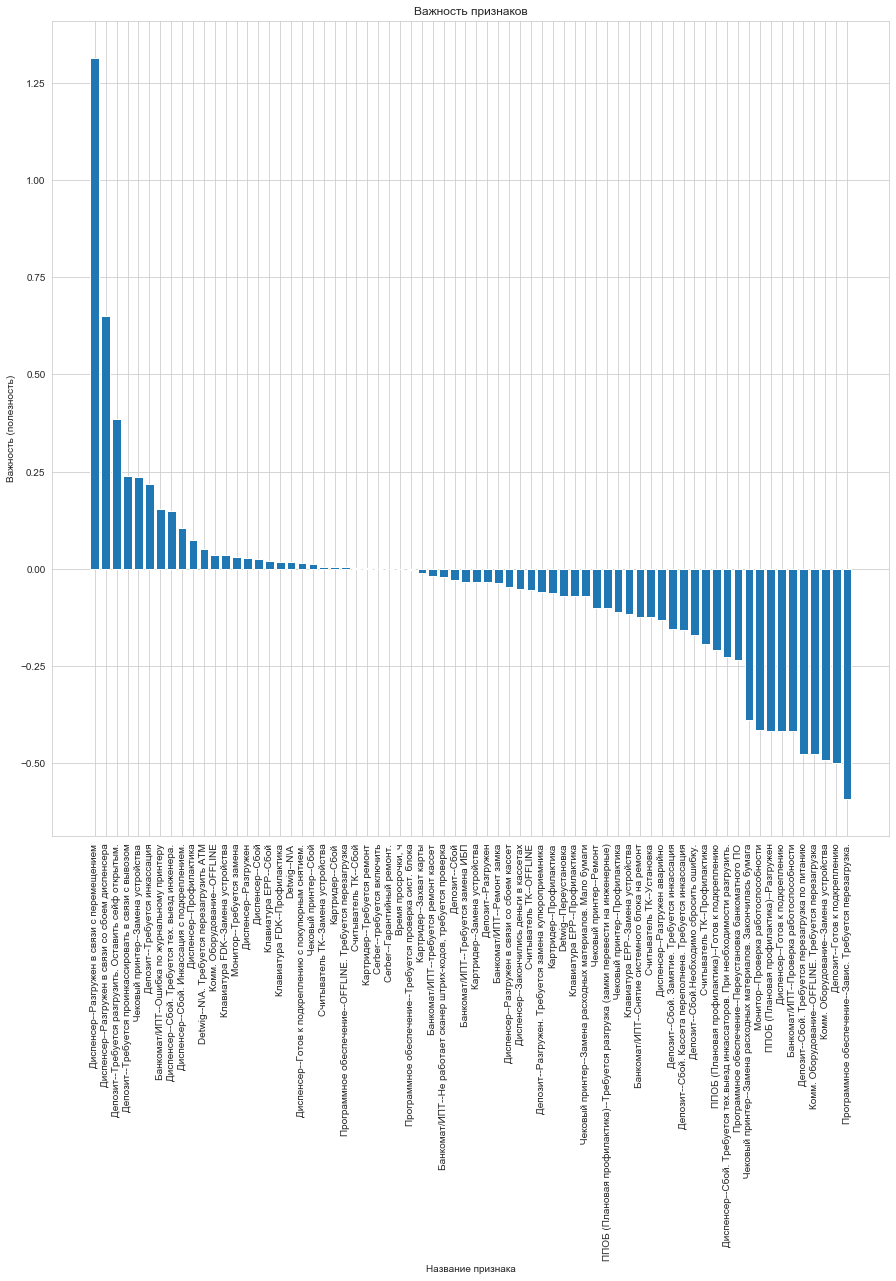

In [76]:
importances = logreg.coef_.flatten()
indices = np.argsort(importances)[::-1]
importances.shape

plt.figure(figsize=(15, 15))

plt.title('Важность признаков')
plt.ylabel('Важность (полезность)')
plt.xlabel('Название признака')

plt.bar(training_points.columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()